In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

In [3]:
def remove_grammar_pontuation(line):
    pontuation = [',','.', ':', ';', '?', '!', '\n']
    for p in pontuation:
        line = line.replace(p, ' ')
    return line

In [4]:
lines = []
characters = []
with open('moliere_avare.txt', 'r', encoding='utf-8') as avare:
    file_lines = avare.readlines()
    
    for line in file_lines[19:33]:
        characters.append(line.split(',')[0].split('–')[1].strip().upper())
    
    for line in file_lines[40:]:
        if line != '\n':
            lines.append(remove_grammar_pontuation(line))

In [5]:
speech_dict = {}
i = 0
while i < len(lines):

    if lines[i].startswith('## '):
        acte = lines[i].split()[2].strip()
        speech_dict[acte] = {}
    elif lines[i].startswith('###'):
        scene = lines[i].split()[2].strip()
        speech_dict[acte][scene] = {}
        for character in characters:
            speech_dict[acte][scene][character] = []
        if not lines[i+1].startswith('    '):
            i+=1
    elif lines[i].startswith('    '):
        charactere = lines[i].split('*')[0].strip().replace('Î', 'I')
    else:
        speech_dict[acte][scene][charactere].append(lines[i].replace('< Fin >', '').strip())
        
    i += 1


In [6]:
scenes_by_character = {}

for character in characters:
    scenes_by_character[character] = 0

for act in speech_dict.keys():
    for scene in speech_dict[act].keys():
        for character in speech_dict[act][scene].keys():
            if len(speech_dict[act][scene][character]) != 0:
                scenes_by_character[character] += 1

In [7]:
lines_by_character = {}
for character in characters:
    lines_by_character[character] = 0

for act in speech_dict.keys():
    for scene in speech_dict[act].keys():
        for character in speech_dict[act][scene].keys():
            lines_by_character[character] += len(speech_dict[act][scene][character])

In [8]:
words_by_character = {}
for character in characters:
    words_by_character[character] = 0

for act in speech_dict.keys():
    for scene in speech_dict[act].keys():
        for character in speech_dict[act][scene].keys():
            for speech in speech_dict[act][scene][character]:
                words_by_character[character] += len(speech.split())

In [9]:
avare_df = pd.DataFrame(data={'Character' : words_by_character.keys(), 'Scenes' : scenes_by_character.values(),
                   'Lines' : lines_by_character.values(), 'Words' : words_by_character.values()})

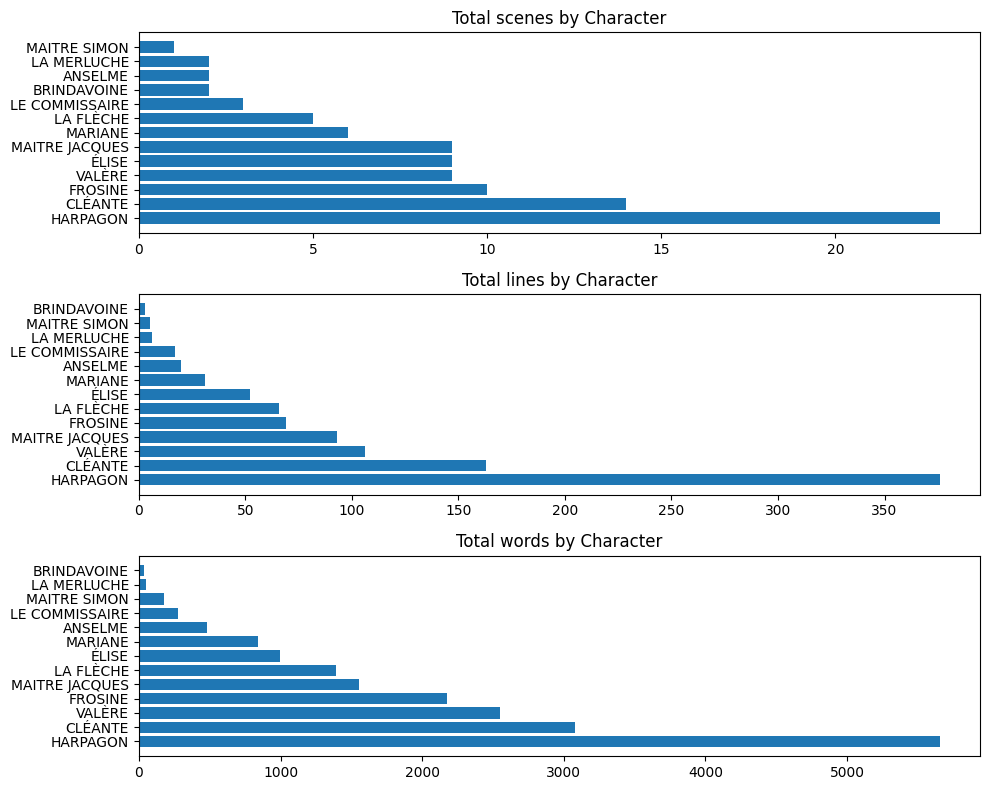

In [49]:
fig, ax = plt.subplots(3,1, figsize=(10,8))

scene_df = avare_df[avare_df['Scenes'] > 0].sort_values(by=['Scenes'], ascending=False)
ax[0].barh(y=scene_df['Character'].to_list(), width=scene_df['Scenes'].to_list())
ax[0].set_title('Total scenes by Character')

line_df = avare_df[avare_df['Lines'] > 0].sort_values(by=['Lines'], ascending=False)
ax[1].barh(y=line_df['Character'].to_list(), width=line_df['Lines'].to_list())
ax[1].set_title('Total lines by Character')

word_df = avare_df[avare_df['Words'] > 0].sort_values(by=['Words'], ascending=False)
ax[2].barh(y=word_df['Character'].to_list(), width=word_df['Words'].to_list())
ax[2].set_title('Total words by Character')

fig.tight_layout()
plt.show();


In [11]:
avare_df[avare_df['Lines'] == 0]

,Character,Scenes,Lines,Words
10,DAME CLAUDE,0,0,0


In [ ]:
words_by_char_and_scene = {}

for act in speech_dict.keys():
    for scene in speech_dict[act].keys():
        if (act, scene) not in words_by_char_and_scene.keys():
            words_by_char_and_scene[(act, scene)] = {}
        for character in speech_dict[act][scene].keys():
            count_words = 0
            for line in speech_dict[act][scene][character]:
                count_words += len(line.split())
            words_by_char_and_scene[(act, scene)][character] = count_words
#words_by_char_and_scene

In [ ]:
def plot_graph(act, scene):
    _, ax = plt.subplots(figsize=(5,4))

    labels = [c for (c,w) in words_by_char_and_scene[(act,scene)].items() if w != 0]
    words = [w for (c,w) in words_by_char_and_scene[(act,scene)].items() if w != 0]

    ax.pie(words, labels=labels, autopct='%1.1f%%')
    ax.set_title("Words by Character")
    plt.show()
    

dropdown_act = widgets.Dropdown(
    options=speech_dict.keys(),
    description="Act:"
)

dropdown_scene = widgets.Dropdown(
    options=speech_dict[dropdown_act.value].keys(),
    description="Scene:"
)

widgets.interactive(plot_graph, act=dropdown_act, scene=dropdown_scene)

interactive(children=(Dropdown(description='Act:', options=('Premier', 'II', 'III', 'IV', 'V'), value='Premier…